# Support Vector Machines


## 1. SVM là gì.



## Bài tập
1. 
w là vector pháp tuyến của hàm quyết định y(x)
2. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(10)

means = [[2, 4], [2, 2]]
cov = [[.2, .1], [.1, .2]]

# Number of sample data
N = 10

# Dimension of sample data
x_dim = (np.array(means).shape)[1]
M = x_dim + 1

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

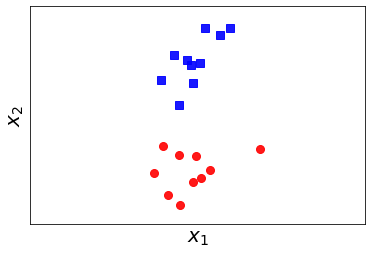

In [2]:
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .9)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .9)
plt.axis('equal')

# axis limits
plt.ylim(1, 5)
plt.xlim(1, 3)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [3]:

from cvxopt import matrix, solvers
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

lambda = 
 [[ 2.05340365e-09 -6.01611568e-10  1.75703771e-09 -1.83639788e-10
  -3.86911768e-10 -9.75849876e-11 -2.47834961e-10 -2.93039059e-10
  -6.22539469e-10  3.44319790e+00  5.37644576e-01  2.90555330e+00
  -1.23997933e-09  1.27033422e-08  1.24161864e-08  2.24426924e-09
   7.52468784e-10 -6.75085576e-10  2.38685532e-10 -3.00058484e-10]]


In [4]:
G

<20x20 matrix, tc='d'>

In [5]:
S = np.where(l > 1e-6)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))

print('w = ', w.T)
print('b = ', b)

w =  [[0.07918923 2.62299927]]
b =  -7.482521425998915


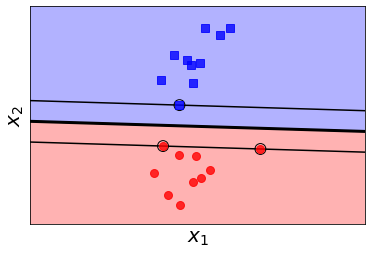

In [6]:
# with PdfPages('svm4.pdf') as pdf:
# draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')


y4 = 10*y1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha='.3')
plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.3')


plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(1, 5)
plt.xlim(1, 3)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors 
for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)


plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
#     pdf.savefig()
plt.show()

In [7]:
Y_X0 = -w[0, 0]/w[1, 0]*X0[:,0] - b/w[1, 0]

In [8]:
mol = np.linalg.norm(w)

In [9]:
X0_dis = Y_X0 / mol

In [10]:
print(X0_dis)

[1.07182472 1.05714406 1.06496756 1.06551378 1.06362145 1.06907576
 1.06239667 1.06621532 1.05933475 1.06788836]


In [11]:
size = np.array(means).shape
size[1]

2

In [12]:
x_dim

2